#Table of content 


1. Problem statement 
2. Exploratory Data Analysis


# Problem statement 


An education company named X education sells online courses to industry professionals. On any given day, many professionals  who are interested in the courses land land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales teams start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X Education is around 30%.


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.





#Exploratory Data Analysis

## Libraries

First of all, we import all the necessary libraries to perform the necessary steps.

In [263]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline




## Dataset

After mounting your google drive, use pandas to read the csv file and check the first rows of the dataset.

In [264]:
lead_data_df = pd.read_csv('/content/drive/MyDrive/X-Education/Lead_Scoring.csv')
lead_data_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Visualize all the info related to the columns.

In [265]:
lead_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##Data Dictionary

In [266]:
dictionary =pd.read_excel("/content/drive/MyDrive/X-Education/Leads Data Dictionary.xlsx")
dictionary.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identified.
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."


In [267]:
pd.set_option('display.max_colwidth', -1)
dictionary.drop('Unnamed: 0',inplace=True,axis=1)
dictionary.columns = dictionary.iloc[1]
dictionary = dictionary.iloc[2:]
dictionary.reset_index(drop=True, inplace=True)
dictionary.head(len(dictionary))

<ipython-input-267-9d00c7c23093>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


Store the information of the original dataset, before data cleaning

In [268]:
n_rows = lead_data_df.shape[0]
print('Number of original rows: {0}'.format(n_rows))



Number of original rows: 9240


##Data Preprocessing


Rename the features for simplicity

In [269]:
lead_data_df.rename(columns={'Converted':'Converted',
                            'Prospect ID':'ProspectId',
                            'Lead Number':'LeadNumber',
                            'Lead Origin':'LeadOrigin',
                            'Lead Source':'LeadSource',
                            'Do Not Email':'DndEmail',
                            'Do Not Call':'DndCall',
                            'TotalVisits':'TotalVisits',
                            'Total Time Spent on Website':'TotalWebsiteTime',
                            'Page Views Per Visit':'PagesPerVisit',
                            'Last Activity':'LastActivity',
                            'Country':'Country',
                            'Specialization':'Specialization',
                            'How did you hear about X Education':'HowHeard',
                            'What is your current occupation':'Occupation',
                            'What matters most to you in choosing a course':'MattersMost',
                            'Search':'Search',
                            'Magazine':'Magazine',
                            'Newspaper Article':'PaperArticle',
                            'X Education Forums':'EducationForum',
                            'Newspaper':'Newspaper',
                            'Digital Advertisement':'DigitalAd',
                            'Through Recommendations':'Recommendation',
                            'Receive More Updates About Our Courses':'ReceiveCourseUpdate',
                            'Tags':'Tags',
                            'Lead Quality':'LeadQuality',
                            'Update me on Supply Chain Content':'UpdateSupplyChain',
                            'Get updates on DM Content':'UpdateDMContent',
                            'Lead Profile':'LeadProfile',
                            'City':'City',
                            'Asymmetrique Activity Index':'ActivityIndex',
                            'Asymmetrique Profile Index':'ProfileIndex',
                            'Asymmetrique Activity Score':'ActivityScore',
                            'Asymmetrique Profile Score':'ProfileScore',
                            'I agree to pay the amount through cheque':'ChequePayment',
                            'A free copy of Mastering The Interview':'FreeCopy',
                            'Last Notable Activity':'LastNotableActivity'},
                   inplace=True)       


bring the target variable at the first index of the dataframe 


In [270]:
variables= list(lead_data_df.columns)
variables.insert(0,variables.pop(variables.index('Converted')))
lead_data_df = lead_data_df.loc[:,variables]


In [271]:
lead_data_df.head()

,Converted,ProspectId,LeadNumber,LeadOrigin,LeadSource,DndEmail,DndCall,TotalVisits,TotalWebsiteTime,PagesPerVisit,...,UpdateDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,ChequePayment,FreeCopy,LastNotableActivity
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,1,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Check for missing values and duplicates

In [272]:
lead_duplicate= lead_data_df.copy()
lead_duplicate.drop_duplicates(subset=None,inplace=True)
lead_duplicate.shape


(9240, 37)

In [273]:
lead_data_df.shape

(9240, 37)

Check for Missing values 

In [274]:
lead_data_df.isnull().sum()

Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             36  
DndEmail               0   
DndCall                0   
TotalVisits            137 
TotalWebsiteTime       0   
PagesPerVisit          137 
LastActivity           103 
Country                2461
Specialization         1438
HowHeard               2207
Occupation             2690
MattersMost            2709
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   3353
LeadQuality            4767
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            2709
City                   1420
ActivityIndex          4218
ProfileIndex           4218
ActivityScore          4218
ProfileScore           4218
ChequePayment          0   
FreeCopy            

We can also compare directly by building a table for a quick check for missing values and duplicates.

In [275]:
pd.DataFrame([[lead_data_df.shape],
              [lead_data_df.isnull().sum().sum()],
             [lead_data_df.duplicated().sum()]],
            columns = ['Dataset'],
            index = ['Shape','Missing values','Duplicates'])

,Dataset
Shape,"(9240, 37)"
Missing values,41039
Duplicates,0


There are many values as 'Select', because the leads have not selected any options. 

In [276]:
lead_data_df[lead_data_df == 'Select'].count()


Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             0   
DndEmail               0   
DndCall                0   
TotalVisits            0   
TotalWebsiteTime       0   
PagesPerVisit          0   
LastActivity           0   
Country                0   
Specialization         1942
HowHeard               5043
Occupation             0   
MattersMost            0   
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   0   
LeadQuality            0   
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            4146
City                   2249
ActivityIndex          0   
ProfileIndex           0   
ActivityScore          0   
ProfileScore           0   
ChequePayment          0   
FreeCopy            

We can see for each feature the number of 'Select' values: particularly, only Specialization, HowHeard, LeadProfile, City.


We need to replace them with NaN values.

In [277]:
lead_data_df.replace('Select',np.NaN,inplace=True)
lead_data_df[lead_data_df == 'Select'].count()


Converted              0
ProspectId             0
LeadNumber             0
LeadOrigin             0
LeadSource             0
DndEmail               0
DndCall                0
TotalVisits            0
TotalWebsiteTime       0
PagesPerVisit          0
LastActivity           0
Country                0
Specialization         0
HowHeard               0
Occupation             0
MattersMost            0
Search                 0
Magazine               0
PaperArticle           0
EducationForum         0
Newspaper              0
DigitalAd              0
Recommendation         0
ReceiveCourseUpdate    0
Tags                   0
LeadQuality            0
UpdateSupplyChain      0
UpdateDMContent        0
LeadProfile            0
City                   0
ActivityIndex          0
ProfileIndex           0
ActivityScore          0
ProfileScore           0
ChequePayment          0
FreeCopy               0
LastNotableActivity    0
dtype: int64

Now we count the percentage of missing values for each feature


In [278]:
lead_data_df.isnull().sum()

Converted              0   
ProspectId             0   
LeadNumber             0   
LeadOrigin             0   
LeadSource             36  
DndEmail               0   
DndCall                0   
TotalVisits            137 
TotalWebsiteTime       0   
PagesPerVisit          137 
LastActivity           103 
Country                2461
Specialization         3380
HowHeard               7250
Occupation             2690
MattersMost            2709
Search                 0   
Magazine               0   
PaperArticle           0   
EducationForum         0   
Newspaper              0   
DigitalAd              0   
Recommendation         0   
ReceiveCourseUpdate    0   
Tags                   3353
LeadQuality            4767
UpdateSupplyChain      0   
UpdateDMContent        0   
LeadProfile            6855
City                   3669
ActivityIndex          4218
ProfileIndex           4218
ActivityScore          4218
ProfileScore           4218
ChequePayment          0   
FreeCopy            

Compute the percentage of missing values for each feature.

In [279]:

perc_miss = round(lead_data_df.isnull().sum() * 100 / len(lead_data_df),2)
perc_miss

Converted              0.00 
ProspectId             0.00 
LeadNumber             0.00 
LeadOrigin             0.00 
LeadSource             0.39 
DndEmail               0.00 
DndCall                0.00 
TotalVisits            1.48 
TotalWebsiteTime       0.00 
PagesPerVisit          1.48 
LastActivity           1.11 
Country                26.63
Specialization         36.58
HowHeard               78.46
Occupation             29.11
MattersMost            29.32
Search                 0.00 
Magazine               0.00 
PaperArticle           0.00 
EducationForum         0.00 
Newspaper              0.00 
DigitalAd              0.00 
Recommendation         0.00 
ReceiveCourseUpdate    0.00 
Tags                   36.29
LeadQuality            51.59
UpdateSupplyChain      0.00 
UpdateDMContent        0.00 
LeadProfile            74.19
City                   39.71
ActivityIndex          45.65
ProfileIndex           45.65
ActivityScore          45.65
ProfileScore           45.65
ChequePayment 

In [280]:
print('number of columns before dropping 50% missing value columns are: {0}'.format(lead_data_df.shape[1]))
lead_data_df = lead_data_df.drop(lead_data_df.loc[:,list(round(100*(lead_data_df.isnull().sum()/len(lead_data_df)), 2)>50)].columns, 1)
print('number of columns after dropping 50%  missing value columns are: {0}'.format(lead_data_df.shape[1]))

number of columns before dropping 50% missing value columns are: 37
number of columns after dropping 50%  missing value columns are: 34


<ipython-input-280-63218b1a0295>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_data_df = lead_data_df.drop(lead_data_df.loc[:,list(round(100*(lead_data_df.isnull().sum()/len(lead_data_df)), 2)>50)].columns, 1)


Recheck the % of missing values for each feature

In [281]:
perc_miss = round(lead_data_df.isnull().sum() * 100 / len(lead_data_df),2)
perc_miss

Converted              0.00 
ProspectId             0.00 
LeadNumber             0.00 
LeadOrigin             0.00 
LeadSource             0.39 
DndEmail               0.00 
DndCall                0.00 
TotalVisits            1.48 
TotalWebsiteTime       0.00 
PagesPerVisit          1.48 
LastActivity           1.11 
Country                26.63
Specialization         36.58
Occupation             29.11
MattersMost            29.32
Search                 0.00 
Magazine               0.00 
PaperArticle           0.00 
EducationForum         0.00 
Newspaper              0.00 
DigitalAd              0.00 
Recommendation         0.00 
ReceiveCourseUpdate    0.00 
Tags                   36.29
UpdateSupplyChain      0.00 
UpdateDMContent        0.00 
City                   39.71
ActivityIndex          45.65
ProfileIndex           45.65
ActivityScore          45.65
ProfileScore           45.65
ChequePayment          0.00 
FreeCopy               0.00 
LastNotableActivity    0.00 
dtype: float64

LeadNumber and ProspectID have unique values for each sample. 

In [282]:
lead_data_df['LeadNumber'].nunique()

9240

In [283]:
lead_data_df['ProspectId'].nunique()

9240

While for instance for another feature (LeadOrigin) we have only 5 categorical values

In [284]:
lead_data_df['LeadOrigin'].nunique()

5

For this reason, we drop LeadNumber and ProspectId. 

In [285]:
lead_data_df.drop(['ProspectId', 'LeadNumber'], 1, inplace = True)

<ipython-input-285-bf98593b3008>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_data_df.drop(['ProspectId', 'LeadNumber'], 1, inplace = True)


##Data Imputation

For each column we should fill the missing values thanks to the Impute module of sklearn. For more details, check
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute



I will use the **SingleImputer** technique for each feature : it is an Univariate imputer for completing missing values with simple strategies.
The aim is to replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

###Country

In [286]:
sns.set(rc={'figure.figsize':(8,8)})

In [287]:
lead_data_df['Country'].value_counts()

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
South Africa            4   
Nigeria                 4   
Germany                 4   
Kuwait                  4   
Canada                  4   
Sweden                  3   
China                   2   
Asia/Pacific Region     2   
Uganda                  2   
Bangladesh              2   
Italy                   2   
Belgium                 2   
Netherlands             2   
Ghana                   2   
Philippines             2   
Russia                  1   
Switzerland             1   
Vietnam                 1   
Denmark                 1   
Tanzania                1   
Liberia                 1   
Malaysia      

<Axes: xlabel='count', ylabel='Country'>

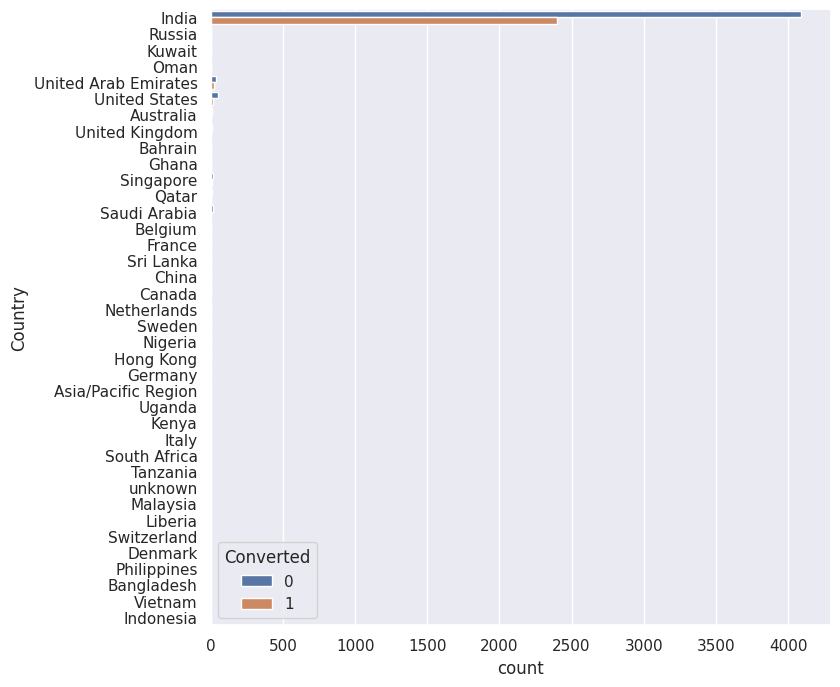

In [288]:
sns.countplot(y=lead_data_df['Country'],hue='Converted',data=lead_data_df)

                

The majority comes from India: we can drop this feature because it is highly imbalanced.

In [289]:
lead_data_df.drop(columns=['Country'],inplace=True)

In [290]:
len(lead_data_df.columns)

31

###City

In [291]:
lead_data_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [298]:
lead_data_df.City.describe()

count     5571  
unique    6     
top       Mumbai
freq      3222  
Name: City, dtype: object

<Axes: xlabel='count', ylabel='City'>

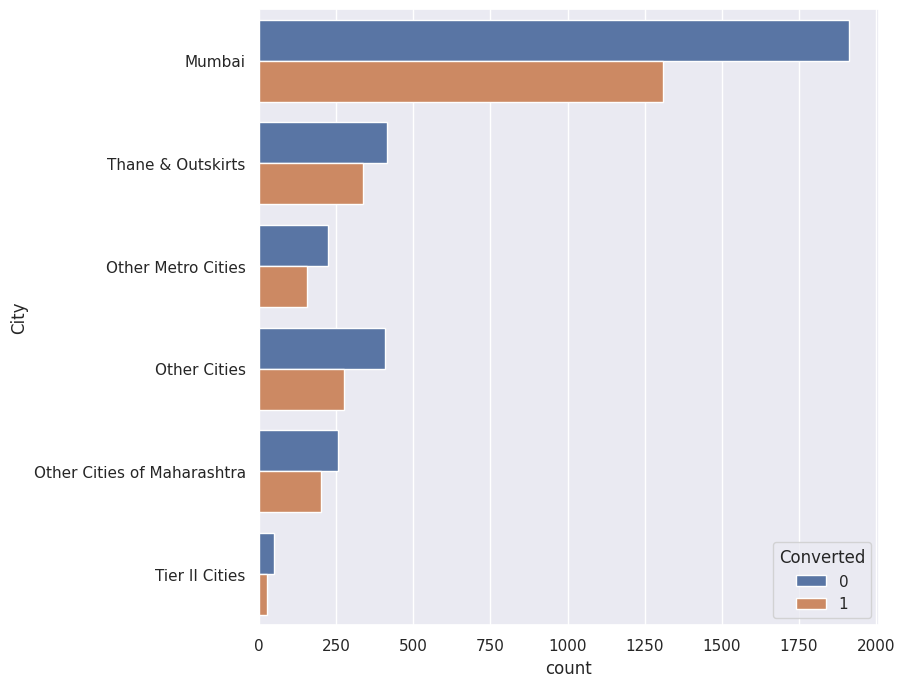

In [305]:
sns.countplot(y=lead_data_df['City'],hue='Converted',data=lead_data_df)


As we can see from the plot, the majority comes from Mumbai. We can impute it for the missing values 

In [311]:
## replace null values with most frequent value
print('Number of observations with null values in column City: {0}'.format(
    lead_data_df['City'].isnull().sum()))

# Use SimpleImputer class
imp = SimpleImputer(missing_values=np.NaN, strategy= 'most_frequent')
imp.fit(lead_data_df[['City']])

print('Most frequent value is : {0}'.format(imp.statistics_[0]))

lead_data_df['City'] = imp.transform(lead_data_df[['City']]).ravel()

print('Number of  null values for the feature LeadSource after imputation: {0}'.format(
    lead_data_df['City'].isnull().sum()))

Number of observations with null values in column City: 3669
Most frequent value is : Mumbai
Number of  null values for the feature LeadSource after imputation: 0


In [ ]:
#Now recheck
sns.countplot(y=lead_data_df['City'],hue='Converted',data=lead_data_df)


In [313]:
lead_data_df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64